## 군집화

In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

**분류 대 군집**

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

아래 코드는 분류와 군집화의 차이를 보여주는 그림을 그린다.

- 왼편: 각 샘플이 속하는 품종에 따른 분류
- 오른편: 지정된 기준에 따라 비슷한 샘플들끼리 그룹짓기

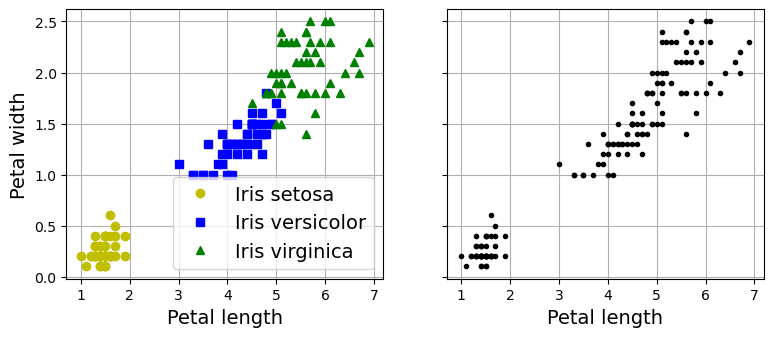

In [4]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

# 왼쪽 : 클래스를 구분한것과 오른쪽 : 구분하지 않은 것

## 1. K-means

먼저 2,000개의 데이터 샘플을 생성한다. 생성되는 데이터는 지정된 5개의 센터를 중심으로 지정된 표준편차를 따르는 원 모양의 데이터 군집을 이룬다. 또한 각각의 군집은 거의 동일한 크기를 갖는다.

In [34]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs # 원형으로 된 데이터셋을 생성하는 코드

# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8     ], [-2.8,  1.3]]) # 각 데이터셋의 중심점 (center)
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1]) # 데이터 셋의 표준 편차
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, # 몇개의 데이터셋을 만들지
                  random_state=7)

In [36]:
y

array([4, 2, 0, ..., 3, 0, 2])

In [37]:
X

array([[-2.69823941,  1.3454702 ],
       [-2.87459835,  1.8097575 ],
       [ 0.96077126,  1.17046777],
       ...,
       [-2.80303543,  2.72948115],
       [ 0.24057359,  2.40103109],
       [-2.63807768,  1.95621065]])

산점도를 그리면 다음과 같다.

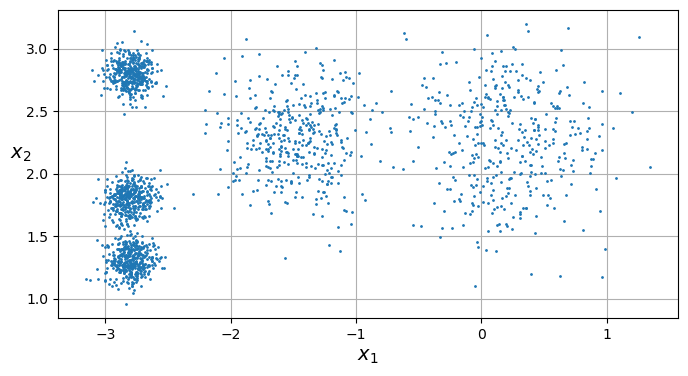

In [6]:
# extra code – this cell generates and saves Figure 9–2

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
# save_fig("blobs_plot")
plt.show()

```python
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
```

In [9]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42) # 클러스터 5개로 지정
y_pred = kmeans.fit_predict(X) # 각 데이터가 어떤 군집으로 할당 되었는지 출력

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [8]:
y_pred # 0,1,2,3,4 총 5개의 군집

array([4, 0, 1, ..., 2, 1, 0])

In [10]:
kmeans.cluster_centers_ # 총 5개 군집들의 각 중심점 좌표

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [16]:
# 새롭게 들어간 x데이터가 어떤 군집에 속하는지
import numpy as np

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]]) # 1번, 1번, 2번,2번 군집으로 예측됨
kmeans.predict(X_new)

array([1, 1, 2, 2])

**보로노이 다이어그램**

군집을 나누는 결정경계를 그리면 보로노이 다이어그램이 생성된다.

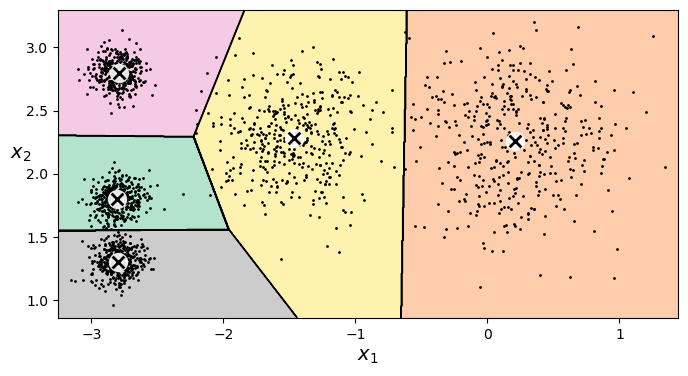

In [12]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    # 바탕 그리기
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")

    # 결정 경계 그리기
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    
    # 훈련 데이터셋과 센트로이드 그리기
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

### 실루엣 점수와 군집수

__실루엣 점수__(silhouette score)는 각 훈련 샘플에 대한 
__실루엣 계수__(silhouette coefficient)의 평균값이다. 
실루엣 계수는 아래와 같이 계산된다.

$$\frac{b - a}{\max(a, b)}$$

* $a$: 동일 군집 내의 다른 샘플과의 거리의 평균값
* $b$: 가장 가까운 타 군집 샘플과의 거리의 평균값

실루엣 계수는 -1과 1 사이의 값이며, 의미는 다음과 같다.

* 1에 가까울 때: 해당 인스턴스가 속하는 군집의 한 센트로이드에 가깝게 위치함.
* 0에 가까울 때: 해당 인스턴스가 속하는 군집의 경계에 가깝게 위치함.
* -1에 가까울 때: 해당 인스턴스가 속하는 군집이 아닌 다른 군집의 센트로이드에 가깝게 위치함.
    즉, 잘못된 군집에 속함.

아래 코드는 군집수가 증가할 때 실루엣 점수의 변화를 보여준다.

```python
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)
```

In [13]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [ ]:
# 실루엣 계수 : 각 데이터셋에 대해 따로 구할 수 있는 것
# 실루엣 점수 : 전체 데이터셋에 대한 실루엣 계수들의 평균

```python
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
```

In [14]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

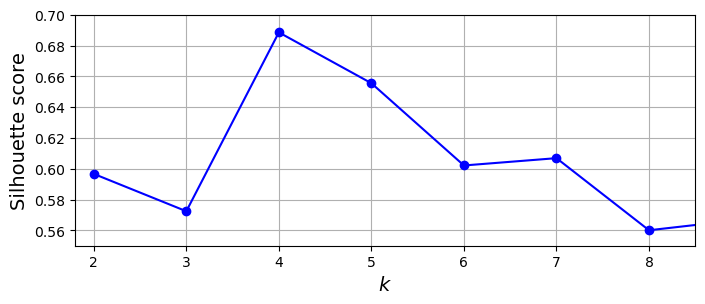

In [15]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]] # 군집의 수에 따른 실루엣 점수를 저장

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()

plt.show()

```python
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()

plt.show()
```

In [ ]:
# 실루엣 계수의 평균(실루엣 score)보다 실루엣 계수들의 고른 정도.

실루엣 다이어그램과 군집수

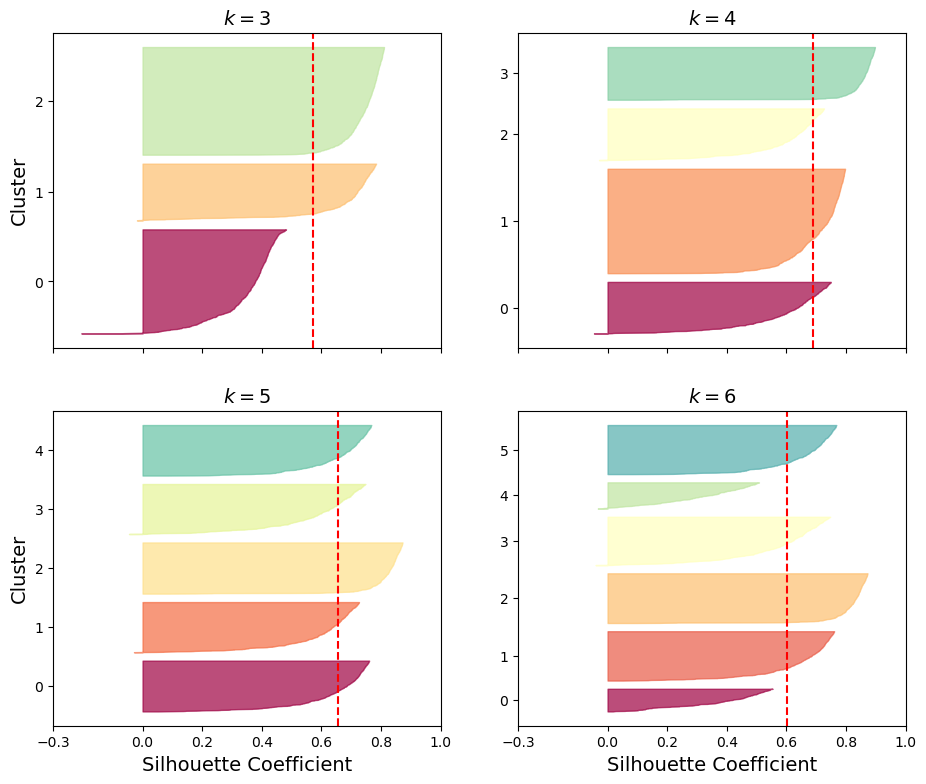

In [17]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.gca().set_xticks([-0.3, 0, 0.2, 0.4, 0.6, 0.8, 1])

    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

# save_fig("silhouette_analysis_plot")
plt.show()

## 2. Hieararchical Clustering

```python
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
```

In [18]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']

```python
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(data,method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(10,5))
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()
```

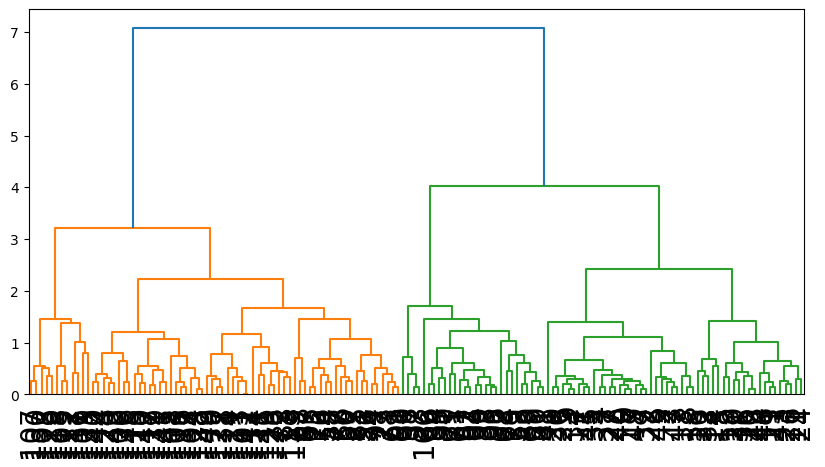

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(data,method='complete') # 데이터들의 군집화 진행 complete: 

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(10,5))
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()
# 붓꽃 데이터 150개에 대해 계층적으로 가까운 데이터끼리 묶어 덴드로그램 그림
# 크게 묶으면 2개로 묶을수 있고 3개, 4개 등등 묶을 수 있음.

```python
from scipy.cluster.hierarchy import cut_tree
y_km = cut_tree(mergings, 3)
```

In [21]:
from scipy.cluster.hierarchy import cut_tree
y_km = cut_tree(mergings, 3) # 군집 3개로 자르기

## 3. DBSCAN

```python
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
```

In [42]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

```python
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()
```

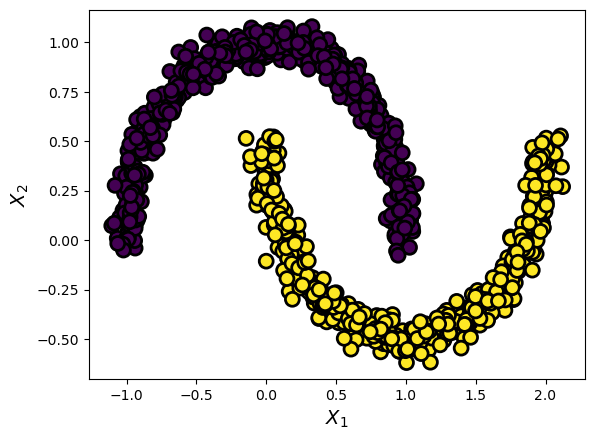

In [23]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [45]:
X

array([[-0.02137124,  0.40618608],
       [ 0.97670045, -0.45832306],
       [ 0.90405882, -0.37651952],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [24]:
dbscan = DBSCAN(eps=0.05, min_samples=5) # 입실론 값과 최소 샘플 개수 지정
dbscan.fit(X)

DBSCAN(eps=0.05)

```python
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)
```

In [25]:
dbscan.labels_[:10] # -1  아웃라이어임 dbscan 특징: 아웃라이어를 제거하고 군집화 해줌

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

```python
dbscan.labels_[:10]
```

In [26]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

```python
np.unique(dbscan.labels_)
```

In [27]:
# 코어포인트의 인덱스
dbscan.core_sample_indices_[:10] # 반경내에 최소 샘플의 수(5)가 있는 데이터들의 인덱스

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

```python
# 코어포인트의 인덱스
dbscan.core_sample_indices_[:10]
```

In [28]:
#코어데이터 목록
dbscan.components_ # 코어 데이터들의 좌표

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

```python
#코어데이터 목록
dbscan.components_
```

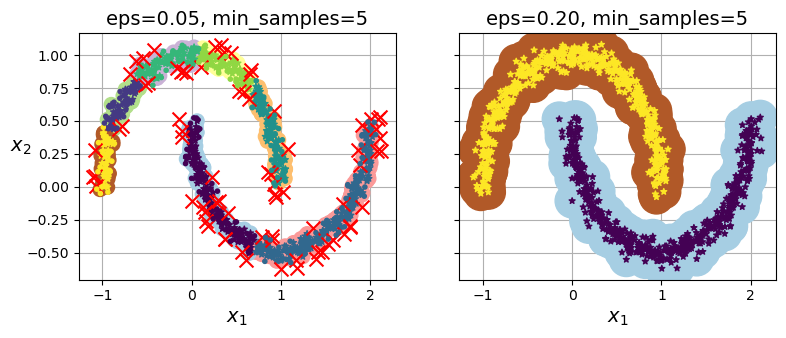

In [29]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

# save_fig("dbscan_plot")
plt.show()

# 입실론 값에 따른 군집 결과를 시각화 한 것.

## 4. Guassian Mixture Model

꽃잎 길이와 너비만으로는 두 개의 군집으로만 구분이 가능해 보인다. 하지만 꽃잎의 길이와 너비와 더불어 꽃받침의 길이와 너비까지 포함한 네 개의 특성을 모두 사용하여 후반부에서 가우시안 혼합 모델을 이용하여 세 개의 군집으로 나눌 수 있다.

In [38]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [39]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [41]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\AppData\Local\Temp\ipykernel_18792\1038929294.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(y_pred[y==class_id])


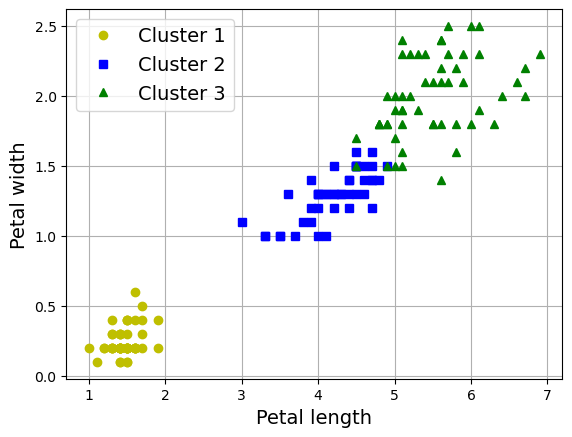

In [31]:
import numpy as np
from scipy import stats
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
# n_components : 찾고자하는 가우시안 분포의 개수

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [33]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

```python
(y_pred==y).sum() / len(y_pred)
```

In [32]:
(y_pred==y).sum() / len(y_pred) # 정확도

0.9666666666666667